# Tutorial on neural networks

## UPenn PHYS 359 - 2021

**Author**: Cyrille Doux

In this notebook, we implement a neural network using a framework called Keras, which is packaged as a python module (you can install it from conda or pip). We'll use a simple dense neural network to infer prices of houses in Boston given a set of properties.

**Important** : if you don't have tensorflow installed, just replace the `import tensorflow.keras.xxx` by `import keras.xxx`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras

## Data
Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

In [2]:
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


## Neural network implementation 
This is where we implement the model with dense layers. We will need two kinds of layer, an input layer and a dense layer, which need to be used as
```
x = Input(shape=(number_of_components,))

h = Dense(units=number_of_neurons, activation=activation_name)(input_layer)
```
The last layer will be called `y` and we will create the neural network by using `Model`.

You can choose the number of layers, the number of units per layer and their activation functions (`'relu'`, `'sigmoid'`, `'tanh'`, etc).

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

x = Input(shape=(x_train.shape[1],))

h = Dense(units=8, activation='relu')(x)
h = Dense(units=4, activation='relu')(h)

y = Dense(units=1, activation='softplus')(h)

model = Model(x, y)

We can print a summary of our model and the number of parameters (weights and biases).

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


The model needs to be compiled. The optimizer (`'adam'`) will find the best learning rate for us and implement some acceleration scheme over simple stochastic gradient descent, but the idea remains the same. Finally, we need to specify the loss, which here will be the mean squared error (`'mean_squared_error'` or `'mse'` for short) as we're dealing with a regression problem. For a classification problem, we could use the binary crossentropy (`'binary_crossentropy'`).

In [5]:
model.compile(optimizer='adam', loss='mse')

## Training

This is simply a plotting function that will make plots during training, don't worry about it.

In [6]:
from IPython.display import clear_output
class PlotLosses(tensorflow.keras.callbacks.Callback):
    def __init__(self):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        if self.i % 5 == 0:
            clear_output(wait=True)
            plt.plot(self.x, self.losses, label="Train loss")
            plt.plot(self.x, self.val_losses, label="Validation loss")
            plt.yscale('log')
            plt.xlabel('Number of epochs')
            plt.ylabel('Losses')
            plt.legend()
            plt.show();

plot_losses = PlotLosses()

<Figure size 432x288 with 0 Axes>

Now we train the network!

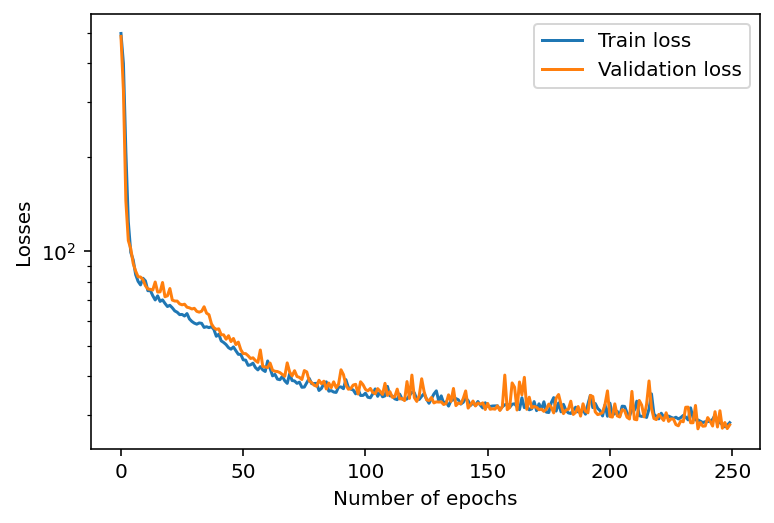

In [7]:
model.fit(x=x_train, y=y_train,
          validation_data=(x_test, y_test),
          batch_size=16,
          epochs=250,
          callbacks=[plot_losses])

In [8]:
y_pred = model.predict(x_test)[:,0]

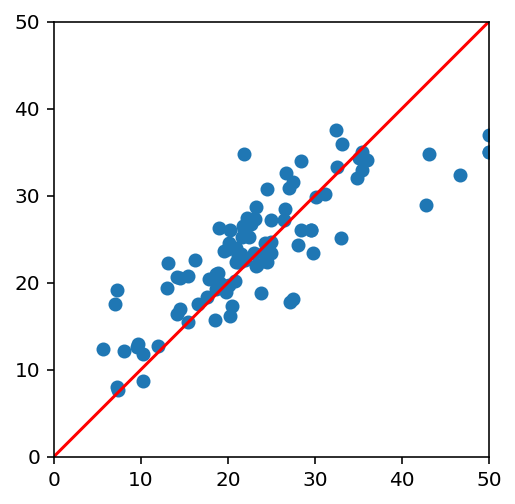

In [9]:
plt.scatter(y_test, y_pred)
plt.gca().set_aspect('equal')
plt.xlim(0,50)
plt.ylim(0,50)
plt.plot([0,50],[0,50], c='r')